<a href="https://colab.research.google.com/github/pgup2501/python-data-analytics-workshop/blob/main/classification_1_winequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross Validation With Multiple Algorithms


We will use credit card default data from https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

## Step-1: Download Data

In [89]:
import os
import urllib.request

data_url = 'https://raw.githubusercontent.com/pgup2501/python-data-analytics-workshop/main/datasets/winequality-red.csv'
red_data = os.path.basename(data_url)


urllib.request.urlretrieve(data_url, red_data)
print('data_location:', red_data)

data_location: winequality-red.csv


In [90]:
import os
import urllib.request

data_url = 'https://raw.githubusercontent.com/pgup2501/python-data-analytics-workshop/main/datasets/winequality-white.csv'
white_data = os.path.basename(data_url)


urllib.request.urlretrieve(data_url, white_data)
print('data_location:', white_data)

data_location: winequality-white.csv


In [91]:
red = pd.read_csv(red_data, sep = ';')
red.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1068,11.10,0.31,0.53,2.20,0.06,3.00,10.00,1.00,3.02,0.83,10.90,7
1538,6.20,0.64,0.09,2.50,0.08,15.00,26.00,1.00,3.57,0.63,12.00,5
59,7.30,0.39,0.31,2.40,0.07,9.00,46.00,1.00,3.41,0.54,9.40,6
973,8.50,0.34,0.44,1.70,0.08,6.00,12.00,1.00,3.52,0.63,10.70,5
1002,9.10,0.29,0.33,2.05,0.06,13.00,27.00,1.00,3.26,0.84,11.70,7
743,11.60,0.41,0.58,2.80,0.10,25.00,101.00,1.00,3.13,0.53,10.00,5
99,8.10,0.55,0.18,1.90,0.08,13.00,35.00,1.00,3.30,0.59,9.00,6
1361,8.30,0.85,0.14,2.50,0.09,13.00,54.00,1.00,3.36,0.54,10.10,5
493,8.70,0.69,0.31,3.00,0.09,23.00,81.00,1.00,3.48,0.74,11.60,6
1597,5.90,0.65,0.12,2.00,0.07,32.00,44.00,1.00,3.57,0.71,10.20,5


In [92]:
white = pd.read_csv(white_data, sep =';')
white.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
561,5.90,0.37,0.10,1.60,0.06,39.00,128.00,0.99,3.24,0.48,10.10,5
4778,5.80,0.32,0.19,19.40,0.03,28.00,106.00,1.00,2.97,0.40,10.55,6
3338,7.20,0.27,0.28,15.20,0.05,6.00,41.00,1.00,3.17,0.39,10.90,6
2977,6.60,0.23,0.20,11.40,0.04,45.00,131.00,1.00,2.96,0.51,9.70,6
816,8.40,0.18,0.42,5.10,0.04,7.00,77.00,0.99,3.16,0.52,11.70,5
2162,9.90,0.49,0.23,2.40,0.09,19.00,115.00,0.99,2.77,0.44,9.40,6
316,6.80,0.25,0.34,4.70,0.03,34.00,134.00,0.99,3.21,0.38,10.60,6
1148,7.00,0.17,0.37,5.70,0.03,29.00,111.00,0.99,3.20,0.49,10.80,6
4207,6.10,0.25,0.30,1.20,0.04,42.00,107.00,0.99,3.34,0.56,10.80,7
4228,6.20,0.29,0.23,12.40,0.05,33.00,201.00,1.00,3.11,0.56,9.90,6


In [93]:
red['Type']='Red'
white['Type']='White'

## Step-2: EDA

In [94]:
#Combining the red dataset and white dataset 
wine = red.append(white,ignore_index=True)
wine.head()

<ipython-input-94-9a75859fc8ef>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wine = red.append(white,ignore_index=True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,Red
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,Red
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,Red
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,Red
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,Red


In [95]:
wine['Type'].value_counts(normalize=True)

White   0.75
Red     0.25
Name: Type, dtype: float64

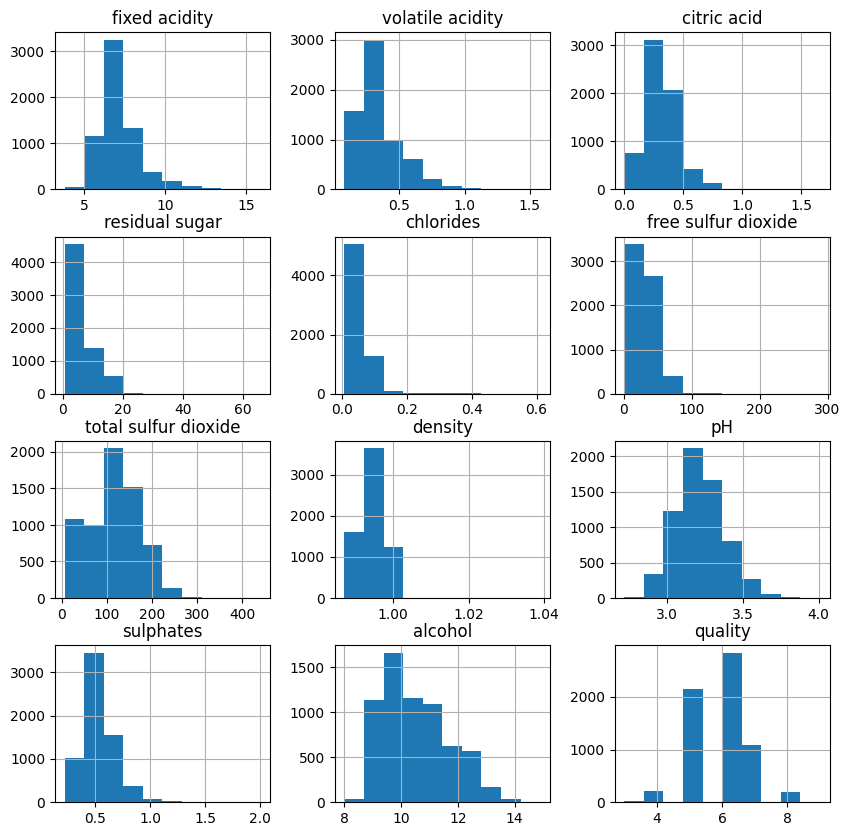

In [96]:
#Visualise
wine.hist(figsize = (10,10));

**Conclusion :** Most of the features are right skewed and quality data looks like categorical 

<Axes: xlabel='quality', ylabel='Count'>

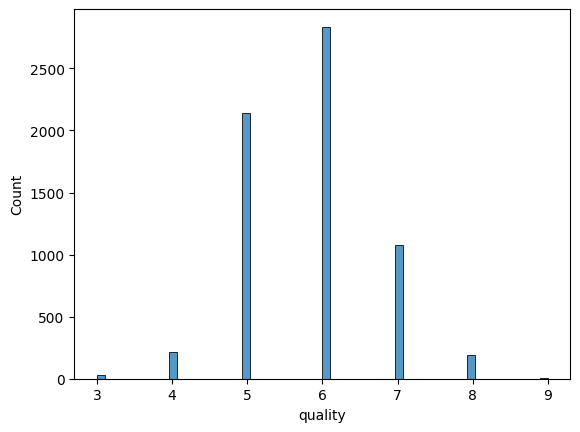

In [97]:
sns.histplot(wine['quality'])

## Step-3: Clean up 



In [98]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

<ipython-input-99-349a79d12925>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wine.corr(), annot=True)


<Axes: >

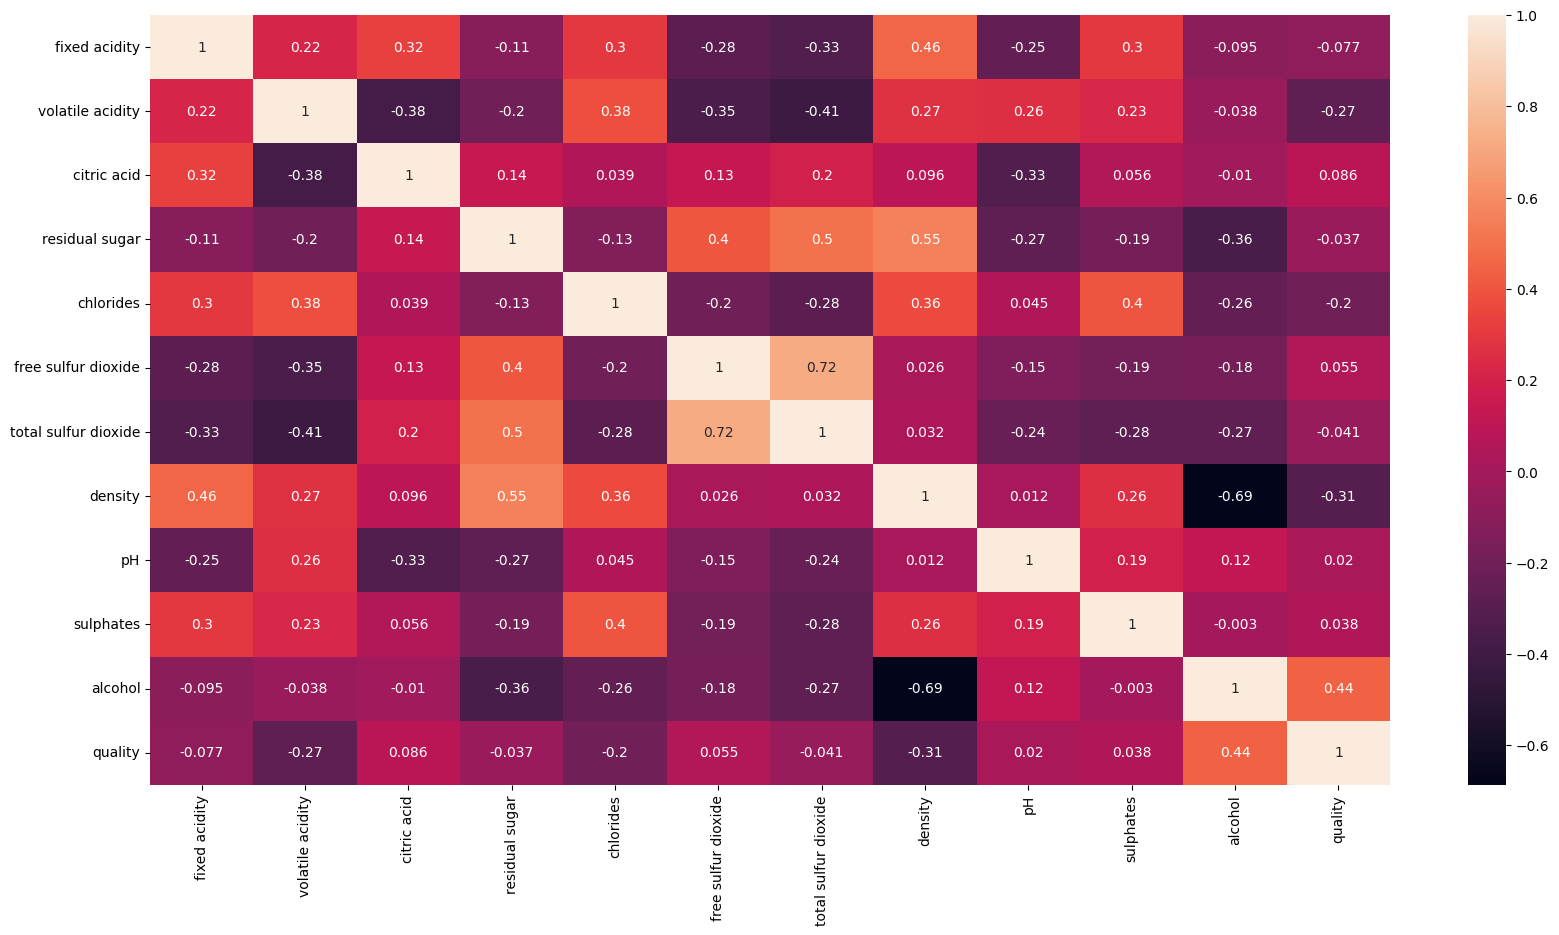

In [99]:
plt.figure(figsize = (20,10))
sns.heatmap(wine.corr(), annot=True)

<Axes: xlabel='quality', ylabel='alcohol'>

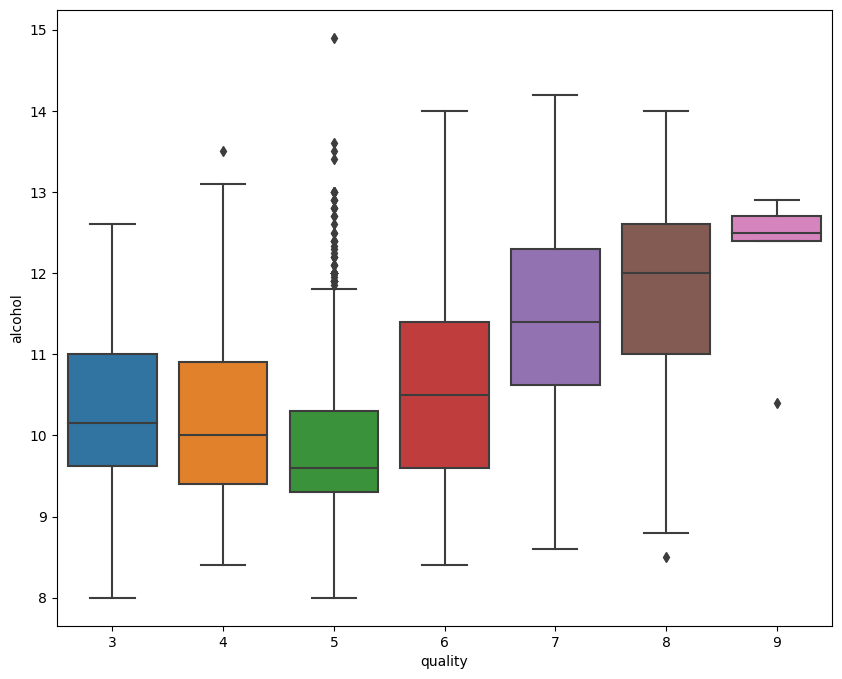

In [100]:
plt.figure(figsize = (10, 8))
sns.boxplot(x=wine['quality'], y=wine['alcohol'],data = wine)
#conclusion quality rating si more if alcohol is more 

<ipython-input-101-8185194b397b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wine.corr() > 0.7, annot=True, cbar=False)


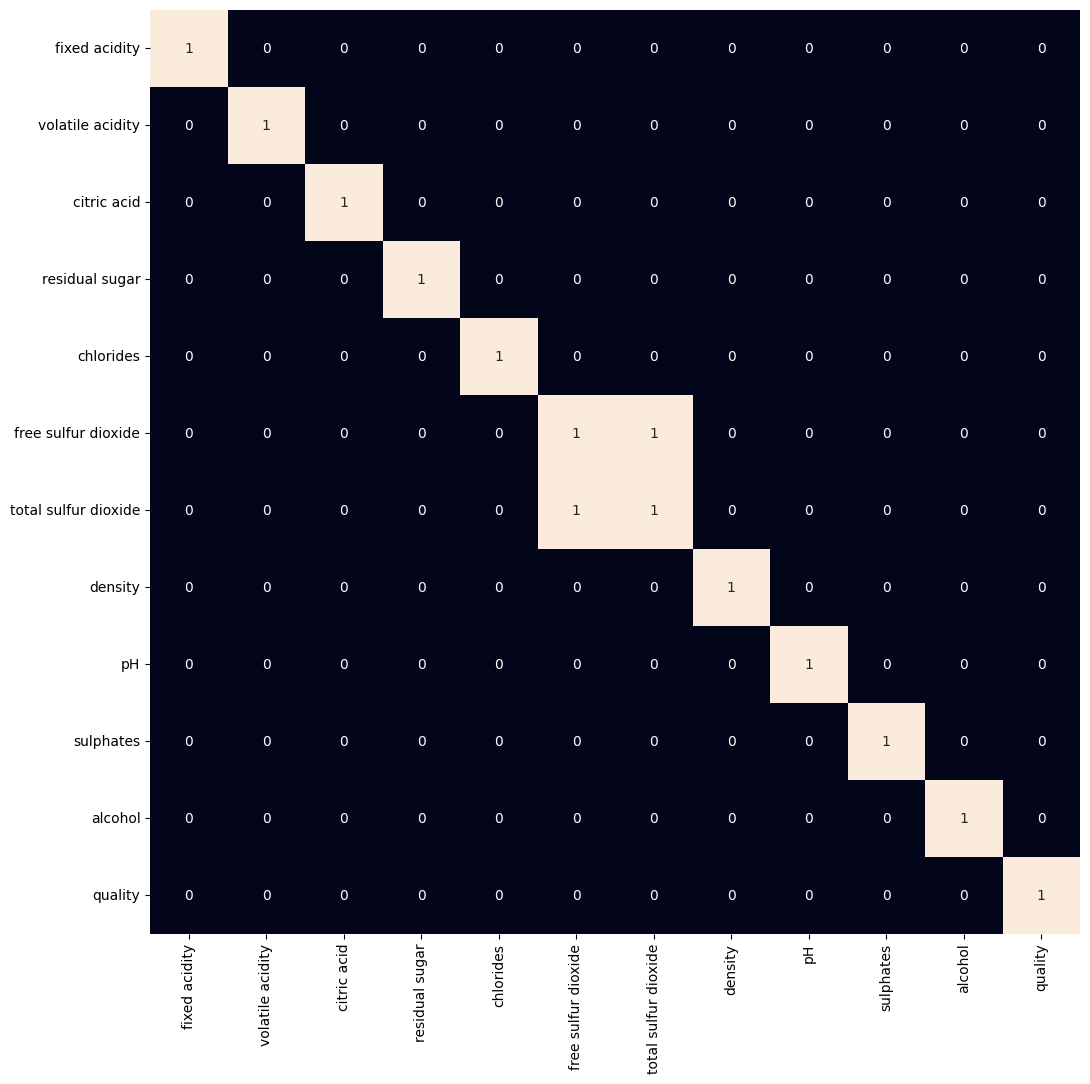

In [101]:

plt.figure(figsize=(12, 12))
sns.heatmap(wine.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [110]:

#wine = wine.drop('total sulfur dioxide', axis=1)

wine.replace({'White': 1, 'Red': 0}, inplace=True)

## Step-4: Shape data

In [111]:
label_col = wine['quality']
## TODO : drop 'ID' and 'default' columns
feature_columns = wine.drop ('quality', axis =1)
#print (feature_columns)

In [112]:
xtrain, xtest, ytrain, ytest = train_test_split(
    feature_columns, label_col, test_size=0.2, random_state=40)

## Step-5: Cross Validation

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from pprint import pprint

## Choose algorithms, we want to compare
## TODO: Here are we are choosing 'default' algorithm
## What if we choose the 'best of' for each algorithm
## See 'hyper-1' notebook for how to get the best algorithm :-) 

algorithms = []
algorithms.append(('LR', LogisticRegression(max_iter=500)))
algorithms.append(('KNN', KNeighborsClassifier()))
algorithms.append(('RF', RandomForestClassifier()))
algorithms.append(('GB', GradientBoostingClassifier()))
algorithms.append(('SVC', SVC()))
algorithms.append(('NB', GaussianNB()))


results = []
names = []
## for classification tasks
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
## for regression tasks
#scoring_metrics = ['r2', 'rmse']
y2 = np.ravel(ytrain)
for name, algo in algorithms:
    print ('\n========= ', name , ' =========')
    kfold = KFold(n_splits=10)
    
    ## cv can be int or kfold
    cv_results = cross_validate(algo, xtrain, y2, cv=5, scoring=scoring_metrics, n_jobs=-1)
    pprint (cv_results)
    # cv_results = cross_val_score(algo, X, y, cv=kfold, scoring=scoring_metric)
    this_result = cv_results['test_accuracy']
    results.append(this_result)
    names.append(name)
    print("\n{}: accuracy : avg={:,.2f}, median={:,.2f},  std={:,.2f},  cv_results={}".format (
        name, np.mean(this_result), np.median(this_result), np.std(this_result), this_result))



=========  LR  =========


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


{'fit_time': array([0.65242147, 0.67835832, 0.64598417, 0.69100308, 0.44754839]),
 'score_time': array([0.0054903 , 0.01033092, 0.01061797, 0.00600362, 0.00406289]),
 'test_accuracy': array([0.51634615, 0.55769231, 0.51780558, 0.55245428, 0.54571704]),
 'test_f1': array([nan, nan, nan, nan, nan]),
 'test_precision': array([nan, nan, nan, nan, nan]),
 'test_recall': array([nan, nan, nan, nan, nan]),
 'test_roc_auc': array([nan, nan, nan, nan, nan])}

LR: accuracy : avg=0.54, median=0.55,  std=0.02,  cv_results=[0.51634615 0.55769231 0.51780558 0.55245428 0.54571704]

=========  KNN  =========


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


{'fit_time': array([0.01274085, 0.00870252, 0.01228833, 0.02132106, 0.01688647]),
 'score_time': array([0.05160522, 0.054456  , 0.05295467, 0.06075025, 0.03542972]),
 'test_accuracy': array([0.48173077, 0.50096154, 0.49663138, 0.4879692 , 0.48411935]),
 'test_f1': array([nan, nan, nan, nan, nan]),
 'test_precision': array([nan, nan, nan, nan, nan]),
 'test_recall': array([nan, nan, nan, nan, nan]),
 'test_roc_auc': array([nan, nan, nan, nan, nan])}

KNN: accuracy : avg=0.49, median=0.49,  std=0.01,  cv_results=[0.48173077 0.50096154 0.49663138 0.4879692  0.48411935]

=========  RF  =========


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


{'fit_time': array([0.96216321, 0.95787072, 0.9546864 , 0.95684719, 0.82272744]),
 'score_time': array([0.04123116, 0.0503397 , 0.0442853 , 0.04661489, 0.03722644]),
 'test_accuracy': array([0.64134615, 0.675     , 0.63330125, 0.6641001 , 0.66602502]),
 'test_f1': array([nan, nan, nan, nan, nan]),
 'test_precision': array([nan, nan, nan, nan, nan]),
 'test_recall': array([nan, nan, nan, nan, nan]),
 'test_roc_auc': array([nan, nan, nan, nan, nan])}

RF: accuracy : avg=0.66, median=0.66,  std=0.02,  cv_results=[0.64134615 0.675      0.63330125 0.6641001  0.66602502]

=========  GB  =========


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


{'fit_time': array([7.39630556, 7.47981954, 7.55309772, 7.57801604, 5.52443194]),
 'score_time': array([0.0161159 , 0.01940155, 0.01810694, 0.01655173, 0.01286411]),
 'test_accuracy': array([0.56634615, 0.60288462, 0.53897979, 0.59672762, 0.57362849]),
 'test_f1': array([nan, nan, nan, nan, nan]),
 'test_precision': array([nan, nan, nan, nan, nan]),
 'test_recall': array([nan, nan, nan, nan, nan]),
 'test_roc_auc': array([nan, nan, nan, nan, nan])}

GB: accuracy : avg=0.58, median=0.57,  std=0.02,  cv_results=[0.56634615 0.60288462 0.53897979 0.59672762 0.57362849]

=========  SVC  =========


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


{'fit_time': array([1.23862314, 1.19599938, 1.21226358, 1.20270157, 0.92087817]),
 'score_time': array([0.31991076, 0.31093192, 0.3152256 , 0.32369733, 0.30664372]),
 'test_accuracy': array([0.47596154, 0.4625    , 0.47930703, 0.4773821 , 0.4773821 ]),
 'test_f1': array([nan, nan, nan, nan, nan]),
 'test_precision': array([nan, nan, nan, nan, nan]),
 'test_recall': array([nan, nan, nan, nan, nan]),
 'test_roc_auc': array([nan, nan, nan, nan, nan])}

SVC: accuracy : avg=0.47, median=0.48,  std=0.01,  cv_results=[0.47596154 0.4625     0.47930703 0.4773821  0.4773821 ]

=========  NB  =========
{'fit_time': array([0.01127267, 0.00399113, 0.00473714, 0.01098776, 0.00681067]),
 'score_time': array([0.01789832, 0.00699663, 0.00593662, 0.0161593 , 0.00736141]),
 'test_accuracy': array([0.46923077, 0.42788462, 0.44465833, 0.44177093, 0.44947064]),
 'test_f1': array([nan, nan, nan, nan, nan]),
 'test_precision': array([nan, nan, nan, nan, nan]),
 'test_recall': array([nan, nan, nan, nan, nan]),

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


## Step-6: Vizualize Results

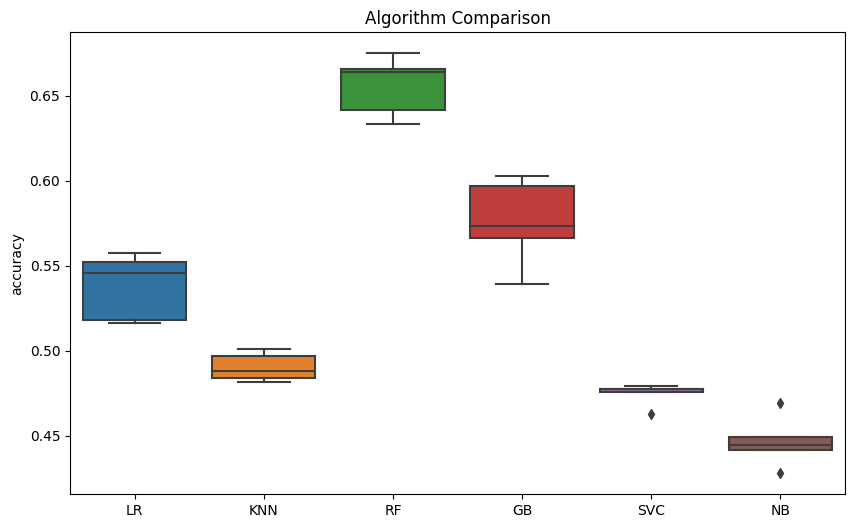

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))

# boxplot algorithm comparison
ax = sns.boxplot(data=results)
ax.set_title('Algorithm Comparison')
ax.set_xticklabels(names)
ax.set_ylabel('accuracy')
plt.show()

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# xtrain, xtest, ytrain, ytest = train_test_split(
#     feature_columns, label_col, test_size=0.2, random_state=40, stratify=label_col)
# # this is not helping 
# sc = StandardScaler()
# X_train = sc.fit_transform(xtrain)
# X_test = sc.fit_transform(xtest)

In [120]:
label_col.value_counts()
# this is the problem

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [121]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(feature_columns, label_col)

In [123]:
y.value_counts()

5    2836
6    2836
7    2836
4    2836
8    2836
3    2836
9    2836
Name: quality, dtype: int64

In [124]:
y.describe()

count   19,852.00
mean         6.00
std          2.00
min          3.00
25%          4.00
50%          6.00
75%          8.00
max          9.00
Name: quality, dtype: float64

In [126]:
xtrain, xtest, ytrain, ytest = train_test_split(
     X, y, test_size=0.2, random_state=40, stratify=y)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from pprint import pprint

## Choose algorithms, we want to compare
## TODO: Here are we are choosing 'default' algorithm
## What if we choose the 'best of' for each algorithm
## See 'hyper-1' notebook for how to get the best algorithm :-) 

algorithms = []
algorithms.append(('LR', LogisticRegression(max_iter=500)))
algorithms.append(('KNN', KNeighborsClassifier()))
algorithms.append(('RF', RandomForestClassifier()))
algorithms.append(('GB', GradientBoostingClassifier()))
algorithms.append(('SVC', SVC()))
algorithms.append(('NB', GaussianNB()))


results = []
names = []
## for classification tasks
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
## for regression tasks
#scoring_metrics = ['r2', 'rmse']
y2 = np.ravel(ytrain)
for name, algo in algorithms:
    print ('\n========= ', name , ' =========')
    kfold = KFold(n_splits=10)
    
    ## cv can be int or kfold
    cv_results = cross_validate(algo, xtrain, y2, cv=5, scoring=scoring_metrics, n_jobs=-1)
    pprint (cv_results)
    # cv_results = cross_val_score(algo, X, y, cv=kfold, scoring=scoring_metric)
    this_result = cv_results['test_accuracy']
    results.append(this_result)
    names.append(name)
    print("\n{}: accuracy : avg={:,.2f}, median={:,.2f},  std={:,.2f},  cv_results={}".format (
        name, np.mean(this_result), np.median(this_result), np.std(this_result), this_result))



=========  LR  =========
{'fit_time': array([1.75056815, 1.79812837, 1.78394723, 1.81260967, 1.18625569]),
 'score_time': array([0.00717092, 0.0141294 , 0.0085237 , 0.00693154, 0.00574875]),
 'test_accuracy': array([0.44224111, 0.43073048, 0.41246851, 0.45528967, 0.42947103]),
 'test_f1': array([nan, nan, nan, nan, nan]),
 'test_precision': array([nan, nan, nan, nan, nan]),
 'test_recall': array([nan, nan, nan, nan, nan]),
 'test_roc_auc': array([nan, nan, nan, nan, nan])}

LR: accuracy : avg=0.43, median=0.43,  std=0.01,  cv_results=[0.44224111 0.43073048 0.41246851 0.45528967 0.42947103]

=========  KNN  =========
{'fit_time': array([0.0252471 , 0.02503586, 0.03505349, 0.04048777, 0.03138399]),
 'score_time': array([0.14400911, 0.14395952, 0.13639331, 0.15246487, 0.0720098 ]),
 'test_accuracy': array([0.77777778, 0.78369018, 0.77991184, 0.7884131 , 0.7720403 ]),
 'test_f1': array([nan, nan, nan, nan, nan]),
 'test_precision': array([nan, nan, nan, nan, nan]),
 'test_recall': array([

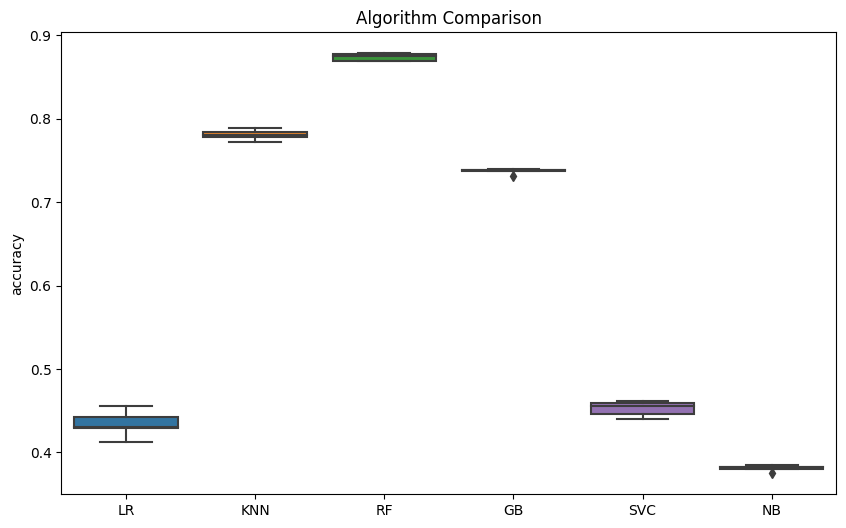

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))

# boxplot algorithm comparison
ax = sns.boxplot(data=results)
ax.set_title('Algorithm Comparison')
ax.set_xticklabels(names)
ax.set_ylabel('accuracy')
plt.show()